<a href="https://colab.research.google.com/github/ClothildeCh/INM707/blob/main/Code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcment Learning Coursework

# Basic tasks

In [ ]:
# 1. Define an environment and the problem to be solved

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


In [ ]:
class ZooEnvironment:
    def __init__(self):
        self.grid_size = (5, 5)  # Defines the size of the zoo grid
        # Defines the layout of the zoo with specific items in grid positions
        self.zoo_layout = [
            ['CLEANING', None, None, None, 'LION'],
            [None, 'ELEPHANT', 'SHOP', None, None],
            [None, None, None, 'PENGUIN', None],
            [None, 'SHOP', None, None, None],
            ['GIRAFFE', None, None, None, 'CLEANING']
        ]
        self.agent_pos = None  # Agent position will be set during reset
        self.num_actions = 4  # Four possible actions: up, down, left, right
        # Initialize the visitation tracker for each animal
        self.visits = {'LION': 0, 'ELEPHANT': 0, 'PENGUIN': 0, 'GIRAFFE': 0}

    def reset(self):
        # Randomly select a starting position for the agent
        self.agent_pos = (random.randint(0, self.grid_size[0] - 1), random.randint(0, self.grid_size[1] - 1))
        # Reset the visitation counts
        self.visits = {'LION': 0, 'ELEPHANT': 0, 'PENGUIN': 0, 'GIRAFFE': 0}
        return self.agent_pos

    def step(self, action):
        # Define action mapping: 0 - up, 1 - down, 2 - left, 3 - right
        action_map = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}

        # Get the next position based on the action
        next_row = self.agent_pos[0] + action_map[action][0]
        next_col = self.agent_pos[1] + action_map[action][1]

        # Check if the next position is within bounds
        if 0 <= next_row < self.grid_size[0] and 0 <= next_col < self.grid_size[1]:
            next_cell = self.zoo_layout[next_row][next_col]  # Get the content of the grid at the next position
            # Determine the reward and whether the episode should end based on the contents of the cell
            if next_cell is not None:
                # Track animal visits
                if next_cell in self.visits:
                    self.visits[next_cell] += 1

                if next_cell == 'LION':
                    reward = 20  # Immediate win upon visiting the Lion
                    done = False
                elif next_cell == 'SHOP':
                    reward = -15  # Changed from immediate fail to big malus
                    done = False
                elif next_cell == 'CLEANING':
                    reward = -5  # Penalty for visiting cleaning
                    done = False  # Game continues
                elif next_cell == 'ELEPHANT':
                    reward = 10  # Few points
                    done = False  # Game continues
                elif next_cell == 'PENGUIN':
                    reward = 10  # Few points
                    done = False  # Game continues
                elif next_cell == 'GIRAFFE':
                    reward = 10
                    done = False  # Game continues
                else:
                    reward = 0  # No special reward or penalty
                    done = False  # Game continues
            else:
                reward = 0  # No reward for visiting empty cells
                done = False  # Game continues
            # Update agent position if not already terminated
            if not done:
                self.agent_pos = (next_row, next_col)
        else:
            # Out of bounds, negative reward and game over
            reward = -1
            done = True

        return self.agent_pos, reward, done

In [ ]:
# 3. Set up the Q-learning parameters (gamma,alpha) and policy
# Using the epsilon greedy policy

class QLearningAgent:
    def __init__(self, num_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.5):
        self.num_actions = num_actions
        self.learning_rate = learning_rate # Alpha
        self.discount_factor = discount_factor  # Gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((5, 5, num_actions))  # Q-table initialized with zeros

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            # Explore: select a random action
            return np.random.choice(self.num_actions)
        else:
            # Exploit: select the action with the highest Q-value for the current state
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_values(self, state, action, reward, next_state):
        # Q-learning update rule
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        td_target = reward + self.discount_factor * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.learning_rate * td_error


In [ ]:
# 4. Run the Q-learning algorithm and represent its performance

Episode 1: Total Reward = 40
Episode 2: Total Reward = 14
Episode 3: Total Reward = -1
Episode 4: Total Reward = 19
Episode 5: Total Reward = 30
Episode 6: Total Reward = 40
Episode 7: Total Reward = -1
Episode 8: Total Reward = 9
Episode 9: Total Reward = 30
Episode 10: Total Reward = -1
Episode 11: Total Reward = 40
Episode 12: Total Reward = 30
Episode 13: Total Reward = -6
Episode 14: Total Reward = 4
Episode 15: Total Reward = -16
Episode 16: Total Reward = 40
Episode 17: Total Reward = 30
Episode 18: Total Reward = -1
Episode 19: Total Reward = 40
Episode 20: Total Reward = 19
Episode 21: Total Reward = 30
Episode 22: Total Reward = 9
Episode 23: Total Reward = 40
Episode 24: Total Reward = 19
Episode 25: Total Reward = -16
Episode 26: Total Reward = 40
Episode 27: Total Reward = 40
Episode 28: Total Reward = 35
Episode 29: Total Reward = 24
Episode 30: Total Reward = 30
Episode 31: Total Reward = 9
Episode 32: Total Reward = 40
Episode 33: Total Reward = -16
Episode 34: Total Re

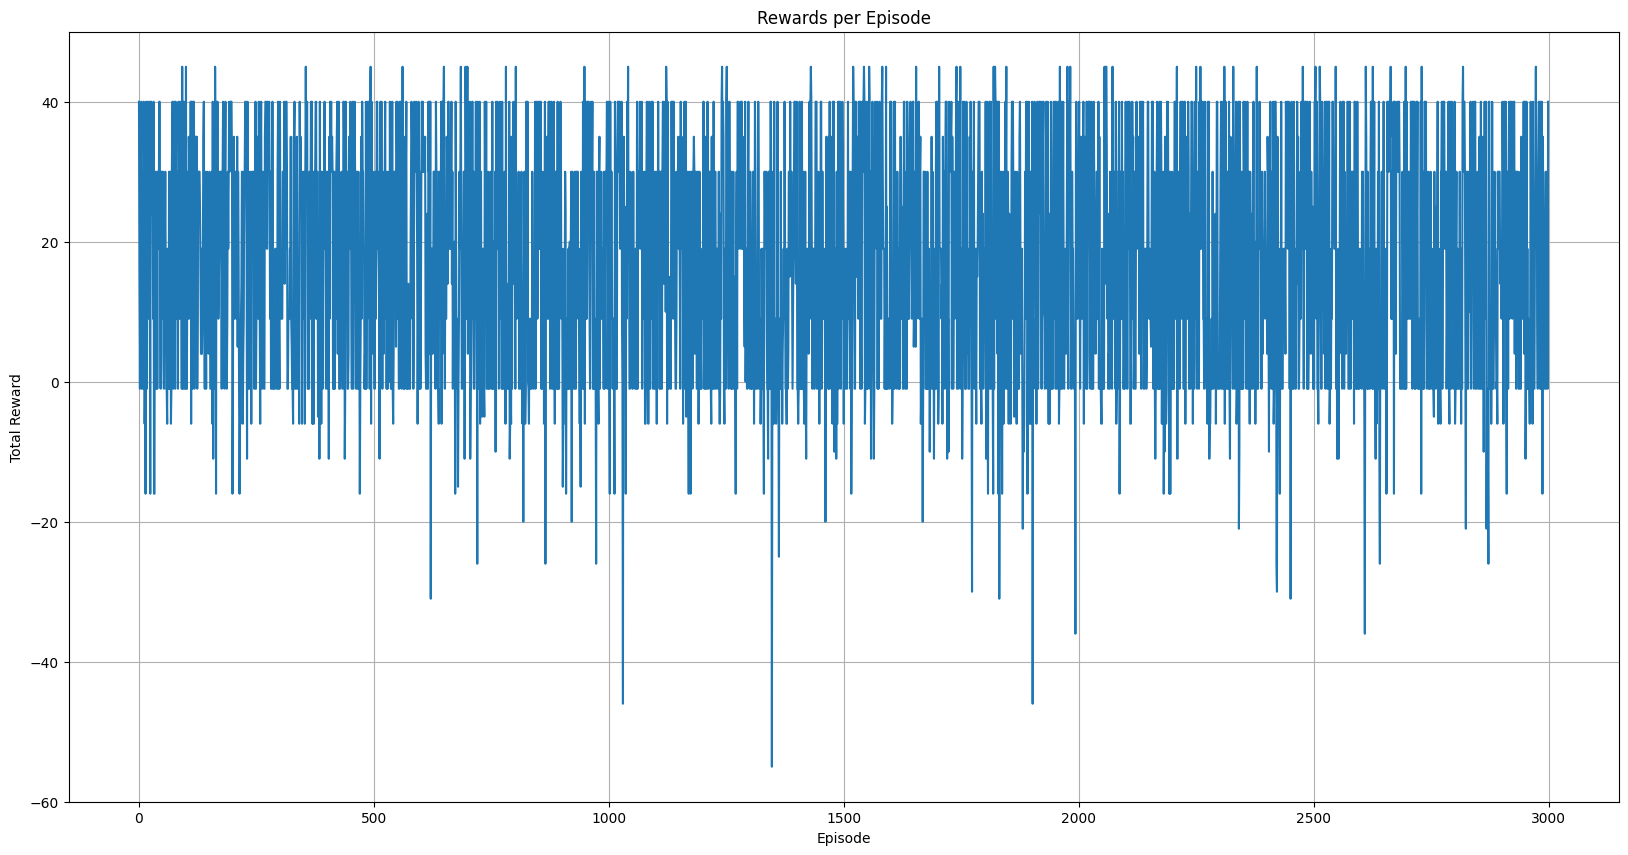

In [ ]:
def run_simulation(episodes, steps_per_episode):
    env = ZooEnvironment()
    agent = QLearningAgent(num_actions=4)

    rewards_per_episode = []  # Track rewards per episode for plotting
    visits_summary = {'LION': 0, 'ELEPHANT': 0, 'PENGUIN': 0, 'GIRAFFE': 0}  # Track total visits to each animal across all episodes

    for episode in range(episodes):
        state = env.reset()
        total_rewards = 0

        for _ in range(steps_per_episode):
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_values(state, action, reward, next_state)
            state = next_state
            total_rewards += reward

            # Stop the episode if total rewards reach or exceed 30
            if total_rewards >= 30 or done:
                break

        rewards_per_episode.append(total_rewards)
        print(f"Episode {episode + 1}: Total Reward = {total_rewards}")

        # Accumulate visits from this episode into the summary
        for animal in visits_summary:
            visits_summary[animal] += env.visits[animal]

    # After all episodes, print out the total visits to each animal
    print("Total visits to each animal:")
    for animal, count in visits_summary.items():
        print(f"{animal}: {count}")

    return rewards_per_episode

# Parameters
episodes = 3000
steps_per_episode = 15

# Run the simulation
rewards = run_simulation(episodes, steps_per_episode)

# Plotting the results
plt.figure(figsize=(20, 10))
plt.plot(rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


In [ ]:
# No convergence even with 10 000 episodes, trying with different parameters.

In [ ]:
# 5. Repeat the experiment with different parameter values, and policies

In [ ]:
# I should track progress of agent more effeciently with rewards and steps tracking

In [ ]:
# Implementing grid search for task 5

In [ ]:
def run_simulation(env, agent, episodes, steps_per_episode):
    rewards_per_episode = []  # Track rewards per episode
    steps_per_episode_list = []  # Track steps taken per episode

    for episode in range(episodes):
        state = env.reset()
        total_rewards = 0  # Initialize rewards counter
        steps = 0  # Initialize step counter

        for _ in range(steps_per_episode):
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_values(state, action, reward, next_state)
            state = next_state
            total_rewards += reward
            steps += 1  # Increment step counter
            if done:
                break

        rewards_per_episode.append(total_rewards)
        steps_per_episode_list.append(steps)  # Record the number of steps for the episode

    # Calculate and return average rewards and average steps
    average_rewards = np.mean(rewards_per_episode)
    average_steps = np.mean(steps_per_episode_list)
    return average_rewards, average_steps

# Parameters to explore
learning_rates = [0.01, 0.2, 0.5]
discount_factors = [0.7, 0.8, 0.9]
epsilons = [0.2, 0.4, 0.6]

results = []  # List to store the results for each configuration

# Grid Search
for lr in learning_rates:
    for gamma in discount_factors:
        for epsilon in epsilons:
            env = ZooEnvironment()
            agent = QLearningAgent(num_actions=4, learning_rate=lr, discount_factor=gamma, epsilon=epsilon)
            performance, avg_steps = run_simulation(env, agent, episodes=100, steps_per_episode=10)
            results.append({
                'Learning Rate': lr,
                'Discount Factor': gamma,
                'Epsilon': epsilon,
                'Performance': performance,
                'Average Steps': avg_steps
            })
            print(f"Config: LR={lr}, Gamma={gamma}, Epsilon={epsilon}, Performance={performance}, Avg Steps={avg_steps}")

# Convert results to DataFrame
df = pd.DataFrame(results)
#print(df)


Config: LR=0.01, Gamma=0.7, Epsilon=0.2, Performance=34.93, Avg Steps=9.0
Config: LR=0.01, Gamma=0.7, Epsilon=0.4, Performance=19.56, Avg Steps=7.43
Config: LR=0.01, Gamma=0.7, Epsilon=0.6, Performance=11.98, Avg Steps=5.79
Config: LR=0.01, Gamma=0.8, Epsilon=0.2, Performance=28.84, Avg Steps=8.43
Config: LR=0.01, Gamma=0.8, Epsilon=0.4, Performance=17.54, Avg Steps=7.07
Config: LR=0.01, Gamma=0.8, Epsilon=0.6, Performance=12.26, Avg Steps=6.51
Config: LR=0.01, Gamma=0.9, Epsilon=0.2, Performance=32.23, Avg Steps=8.3
Config: LR=0.01, Gamma=0.9, Epsilon=0.4, Performance=21.56, Avg Steps=7.17
Config: LR=0.01, Gamma=0.9, Epsilon=0.6, Performance=11.66, Avg Steps=6.55
Config: LR=0.2, Gamma=0.7, Epsilon=0.2, Performance=35.27, Avg Steps=8.39
Config: LR=0.2, Gamma=0.7, Epsilon=0.4, Performance=19.11, Avg Steps=7.37
Config: LR=0.2, Gamma=0.7, Epsilon=0.6, Performance=10.36, Avg Steps=6.97
Config: LR=0.2, Gamma=0.8, Epsilon=0.2, Performance=32.5, Avg Steps=7.83
Config: LR=0.2, Gamma=0.8, Epsil

In [ ]:
# Save DataFrame to CSV for further analysis and appendix
df.to_csv('Q_learning_results_steps.csv', index=False)
print("Results saved to folder")


Results saved to folder


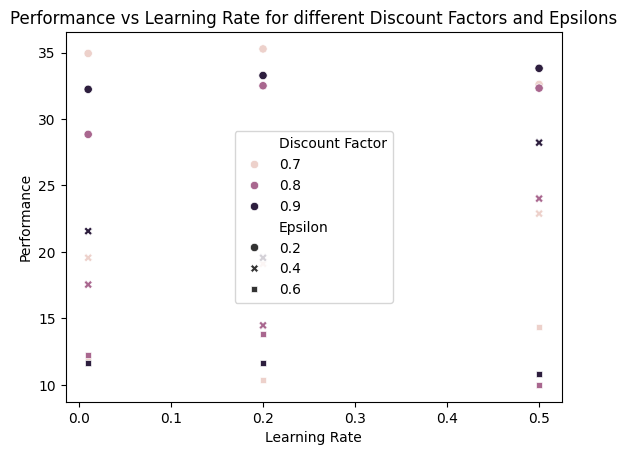

In [ ]:
# Plotting Performance vs hyperparameters
sns.scatterplot(data=df, x='Learning Rate', y='Performance', hue='Discount Factor', style='Epsilon')
plt.title('Performance vs Learning Rate for different Discount Factors and Epsilons')
plt.show()


In [ ]:
# Notes
# Should the lion be 30 points ? It would'nt encourage the agent to visit the other animals...
# To do: add tracking of animals visited - done.
# the giraffe has few visits - to do: decrease penalties - done
# Should the Agent know the size of the grid ? Would it help convergence
# Struggle to find optimal step limit - To Do: add steps tracking - Done.

In [ ]:
# 6. Analyze the results quantitatively and qualitatively - in written report.

# Advanced tasks

In [ ]:
# 7. Implement DQN with two improvements

In [ ]:
import numpy as np
import random
from collections import deque
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf
import matplotlib.pyplot as plt
import time


In [ ]:
class DynamicZooEnvironment:
    def __init__(self, grid_size=10):
        self.grid_size = grid_size  # Set the size of the grid
        self.reset()  # Initialize the environment state

    def reset(self):
        self.grid = np.zeros((self.grid_size, self.grid_size))  # Create a zero-filled grid
        self.place_items()  # Place animals and obstacles on the grid
        # Set a random starting position for the agent within the grid
        self.agent_pos = (random.randint(0, self.grid_size-1), random.randint(0, self.grid_size-1))
        self.cumulative_reward = 0  # Reset cumulative reward at the start of each episode
        return self.agent_pos

    def place_items(self):
        self.grid.fill(0)  # Clear the grid to start fresh
        for _ in range(5):  # Place 5 animals at random positions
            x, y = np.random.randint(0, self.grid_size, size=2)
            self.grid[x, y] = np.random.randint(1, 6)  # Animals are represented by integers 1, 2, 3etc
        for _ in range(3):  # Place 3 obstacles at random positions
            x, y = np.random.randint(0, self.grid_size, size=2)
            self.grid[x, y] = np.random.randint(-3, -1)  # Obstacles are represented by -1, -2etc

    def step(self, action):
        # Define action mappings for movement: up, down, left, right
        movement = [(0, -1), (0, 1), (-1, 0), (1, 0)]

        # Ensure the action index is within the valid range of the movement list
        action = max(0, min(action, len(movement) - 1))

        # Calculate the next position based on the current position and movement direction
        next_pos = tuple(np.add(self.agent_pos, movement[action]))

        # Check if the next position is within the grid boundaries
        if 0 <= next_pos[0] < self.grid_size and 0 <= next_pos[1] < self.grid_size:
            self.agent_pos = next_pos  # Update the agent's position
            reward = self.grid[self.agent_pos]  # Reward is based on what's in the grid cell
        else:
            reward = -1  # Penalty for attempting to move out of bounds, position doesnt change

        # Update cumulative reward and check game termination condition
        self.cumulative_reward += reward
        done = self.cumulative_reward >= 30  # Game ends if cumulative reward reaches 30 points

        return self.agent_pos, reward, done


In [ ]:
class DQN:
    def __init__(self, env):
        self.env = env # Initialize the DQN with an environment
        self.memory = deque(maxlen=2000) # Replay memory to store past transition tuples
        self.gamma = 0.95 # Discount factor for future rewards
        self.epsilon = 1.0 # Initial exploration rate
        self.epsilon_min = 0.01 # Minimum value that epsilon can decay to
        self.epsilon_decay = 0.995 # Decay rate for the exploration probability epsilon
        self.learning_rate = 0.001 # Learning rate for the neural network optimizer
        self.model = self._build_model() # Primary neural network model for estimating Q-values
        # Target neural network model to stabilize learning
        self.target_model = self._build_model()
        # Initialize the target model's weights to match the primary model
        self.update_target_model()

    def _build_model(self):
        # Build a neural network for deep Q-learning with two hidden layers
        model = models.Sequential()
        model.add(layers.Dense(16, input_dim=2, activation='relu'))  # First hidden - scaled back to 16 neurons
        #model.add(layers.Dense(24, activation='relu'))  # Second hidden layer with 24 neurons
        # Output layer with one neuron per possible action
        model.add(layers.Dense(self.env.grid_size**2, activation='linear'))
        # Compile the model using Mean Squared Error for loss function and an Adam optimizer
        model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        # Synchronize the target model's weights with the one of the primary model
        self.target_model.set_weights(self.model.get_weights())

    def act(self, state):
        # Decide an action based on the epsilon-greedy policy
        if np.random.rand() <= self.epsilon:
            # select a random action aka exploration with probability epsilon
            return random.randrange(self.env.grid_size**2)
        # Or use the model to predict Q-values and choose the best action ie exploitation
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Train the model on a minibatch of experiences from the replay memory
        minibatch = random.sample(self.memory, min(len(self.memory), batch_size))
        for state, action, reward, next_state, done in minibatch:
            # Initialize the target for the Q-value update
            # If next state is not terminal, add discounted max future Q-value
            target = reward if done else (reward + self.gamma * np.amax(self.target_model.predict(next_state)[0]))
            # Get the current predictions for all actions in state
            target_f = self.model.predict(state)
            # Update the target for the action taken
            target_f[0][action] = target
            # Train the model on the state and updated Q-values
            self.model.fit(state, target_f, epochs=1, verbose=0)
         # decay the exploration rate epsilon.
        if self.epsilon > self.epsilon_min:
           self.epsilon *= self.epsilon_decay


In [ ]:
def train_dqn(episode_count):
    # Initialize the environment with a grid size of 10x10
    env = DynamicZooEnvironment(grid_size=10)
    # Create a DQN agent with the environment
    agent = DQN(env)
    all_rewards = []  # List to store cumulative rewards of each episode
    losses = []  # List to store losses

    # Loop over each episode for training.
    for e in range(episode_count):
        start_time = time.time()  # Start time of the episode
        # reset the environment at the start of each episode and receive the initial state
        state = env.reset()
        # Reshape the state for compatibility with the neural network input
        state = np.reshape(state, [1, 2])
        total_reward = 0  # Initialize total reward for this episode
        #done = False  # Initialize the 'done' flag for each new episode
        step_count = 0


        # Loop for a maximum of 500 time steps per episode
        for time_step in range(500):
            # Agent selects an action based on current state using epsilon-greedy policy
            action = agent.act(state)
            # Environment returns the next state, reward, and done flag after executing the action
            next_state, reward, done = env.step(action)
            total_reward += reward
            # Reshape the next state to match the network input shape
            next_state = np.reshape(next_state, [1, 2])

            # store the transition in the agent's memory for experience replay
            agent.memory.append((state, action, reward, next_state, done))
            # Update the current state to the next state.
            state = next_state
            step_count += 1

            if done:
                break

            # Replay not after every fixed number of steps
            if step_count % 100 == 0:  # Replay every 100 steps
                if len(agent.memory) > batch_size:
                    loss = agent.replay(batch_size)
                    losses.append(loss)

        all_rewards.append(total_reward)
        print(f"Episode: {e+1}/{episode_count}, Score: {total_reward}, Steps: {step_count}")

        # Update target network  every 10 episodes
        if (e + 1) % 10 == 0:
            agent.update_target_model()


    # Plotting the rewards and losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(all_rewards)
    plt.title('Reward Per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title('Loss Per Training Step')
    plt.xlabel('Training Step')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

    return all_rewards, losses

batch_size = 64

In [ ]:
# To do: add data collection for plotting perf curves - done

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Aug  7 13:07:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
train_dqn(20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

KeyboardInterrupt: 

In [ ]:
# Taking hours, moving to Google colab...
# Still taking hours, adding episode progress tracker - stuck in memory replay
# Reduced use of memory replay - done

In [ ]:
# task 9 : Apply the RL algorithm of your choice (from rllib) to one of the Atari Learning Environment

In [1]:
import gym
import ray
from ray import tune
#from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.algorithms.ppo import PPO # THOSE *$! CHANGED THE MODULE NAME
# https://discuss.ray.io/t/ray-rllib-agents-ppo-missing/9904
from ray.tune.registry import register_env


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
2024-08-09 12:51:24,761	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [34]:
# Configure the PPO algorithm using PPOConfig
config = PPOConfig()
config.environment(env="MountainCar-v0")  # I chose MountainCar-v0
config.framework("torch")  # For tensor later
config.resources(num_gpus=1)  # Trying with G4
config.rollouts(num_rollout_workers=2, rollout_fragment_length=100)  # Set rollout parameters
config.training(train_batch_size=4000, sgd_minibatch_size=128, num_sgd_iter=10, lr=0.0001)  # Training settings


2024-08-09 13:20:31,052	WARNING algorithm_config.py:2578 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.


In [39]:

# Model configuration
config.model = {
    "fcnet_hiddens": [256, 256],  # Hidden layers for both policy and value function
    "fcnet_activation": "relu",   # Activation function for both policy and value function here ReLu
    "vf_share_layers": True,       # Share layers between policy and value function
    "custom_model": None,          # Mendatory
    "custom_model_config": {},     # Mendatory
    "max_seq_len": 20,
}


In [40]:
# Build the PPO algorithm using the configuration
agent = config.build()


2024-08-09 13:24:45,886	WARNING algorithm_config.py:2578 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
(pid=22778) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=22778)   if (distutils.version.LooseVersion(tf.__version__) <
(pid=22778) DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!
(RolloutWorker pid=22779) /usr/local/lib/python3.10/dist-packages/ray/rllib/models/catalog.py:786: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumP

In [41]:
# Train the agent
n_iterations = 10  # Reduced it was too long :(
for i in range(n_iterations):
    result = agent.train()
    print(f"Iteration {i+1}: episode_reward_mean = {result['episode_reward_mean']}")
# Get GPU for more itérations

Iteration 1: episode_reward_mean = -200.0
Iteration 2: episode_reward_mean = -200.0
Iteration 3: episode_reward_mean = -200.0
Iteration 4: episode_reward_mean = -200.0
Iteration 5: episode_reward_mean = -200.0
Iteration 6: episode_reward_mean = -200.0
Iteration 7: episode_reward_mean = -200.0
Iteration 8: episode_reward_mean = -200.0
Iteration 9: episode_reward_mean = -200.0
Iteration 10: episode_reward_mean = -200.0


In [49]:

# Disable environment checking to avoid potential issues with old APIs
config.environment(disable_env_checking=True)


In [53]:
# Evaluate the trained agent
state, _ = env.reset()  # Adjusting for (state, info)
done = False
total_reward = 0

# Having issue with tables
print(f"Initial state shape: {state.shape}")

while not done:
    # Print the shape of the state before sending it to the model
    print(f"State shape before compute_single_action: {state.shape}") # maybe wrong t module

    # Should not have 256 col check input
    state = state.reshape(1, -1)  # Reshape to be 2D

    action = agent.compute_single_action(state)

    # For updqte:
    print(f"Chosen action: {action}")

    state, reward, done, _ = env.step(action)

    # For update:
    print(f"New state shape after step: {state.shape}")

    total_reward += reward
    env.render()

print(f"Total reward after evaluation: {total_reward}")


2024-08-09 13:50:22,209	ERROR checker.py:258 -- Exception mat1 and mat2 shapes cannot be multiplied (1x1 and 2x256) raised on function call without checkin input specs. RLlib will now attempt to check the spec before calling the function again.


Initial state shape: ()
State shape before compute_single_action: ()


SpecCheckingError: input spec validation failed on TorchMLPEncoder.forward, Mismatch found in data element ('obs',), which is a TensorSpec: Expected shape ('b', 2) but found (1, 1, 1).